In [280]:
from IPython.display import Image, SVG
from importlib import reload

In [269]:
with open('__init__.py', 'w') as init:
    pass

In [270]:
!dir /b

.ipynb_checkpoints
classes.task1x.svg
classes.task2x.svg
classes.temp2.svg
task1x.py
task2x.py
temp2.py
w5.ipynb
__init__.py
__pycache__


# Polymorphism

In [173]:
%%writefile temp2.py
# coding=UTF-8


class Publication:
    __title = ""
    __text = ""

    def __init__(self, title, text):
        self.__title = title
        self.__text = text

    def get_title(self):
        return self.__title

    def get_text(self):
        return self.__text

    def set_title(self, title):
        self.__title = title

    def set_text(self, text):
        self.__text = text

    def __str__(self):
        return self.get_str()


class News(Publication):
    __publication_date = ""
    __sources = []

    def __init__(self, title, text, publication_date, sources):
        super().__init__(title, text)
        self.__publication_date = publication_date

        self.set_sources(sources)

    def set_publication_date(self, publication_date):
        self.__publication_date = publication_date

    def get_publication_date(self):
        return self.__publication_date

    def set_sources(self, sources):
        if not isinstance(sources, list):
            self.__sources = [sources]
        else:
            self.__sources = sources

    def get_sources(self):
        return self.__sources

    def get_str(self):
        return " ".join(["News:", self.get_title(), "\n",
                        "Text:", self.get_text(), "\n",
                        "Publication date:", self.get_publication_date(), "\n",
                        "Sources: ", " ".join(self.get_sources()), "\n",
                        "------------------------------------------------\n"])


class Announcement(Publication):
    __out_date = ""

    def __init__(self, title, text, out_date):
        super().__init__(title, text)
        self.__out_date = out_date

    def get_out_date(self):
        return self.__out_date

    def set_out_date(self, out_date):
        self.__out_date = out_date

    def get_str(self):
        return " ".join(["Announcement:", self.get_title(), "\n",
                        "Text:", self.get_text(), "\n",
                        "Out date:", self.get_out_date(), "\n",
                        "------------------------------------------------\n"])

class Article(Publication):
    __authors = []

    def __init__(self, title, text, authors):
        super().__init__(title, text)
        self.set_authors(authors)

    def set_authors(self, authors):
        if not isinstance(authors, list):
            self.__authors = [authors]
        else:
            self.__authors = authors

    def get_authors(self):
        return self.__authors

    def get_str(self):
        return " ".join(["Article:", self.get_title(), "\n",
                        "Text:", self.get_text(), "\n",
                        "Authors:", ", ".join(self.get_authors()), "\n",
                        "------------------------------------------------\n"])

if __name__ == "__main__":

    news = News("Braking news!", "That's a really exiting news!", "12 of November 2016", ["CNN", "BBC"])
    announce = Announcement("New announcement!", "I want to by an elephant!", "15 of December 2016")
    article = Article("We have new investigation", "Мы изобрели зелененький глазовыколупыватель", ["Профессор Бред",
                                                                                                   "Ассистент Капитан Очевидность"])
    
    strange_list = [news, announce, "Просто кусок непонятного бреда", article]

    for element in strange_list:
        if isinstance(element, Publication):
            print(element)

Overwriting temp2.py


In [174]:
%run temp2.py

News: Braking news! 
 Text: That's a really exiting news! 
 Publication date: 12 of November 2016 
 Sources:  CNN BBC 
 ------------------------------------------------

Announcement: New announcement! 
 Text: I want to by an elephant! 
 Out date: 15 of December 2016 
 ------------------------------------------------

Article: We have new investigation 
 Text: Мы изобрели зелененький глазовыколупыватель 
 Authors: Профессор Бред, Ассистент Капитан Очевидность 
 ------------------------------------------------



parsing temp2.py...


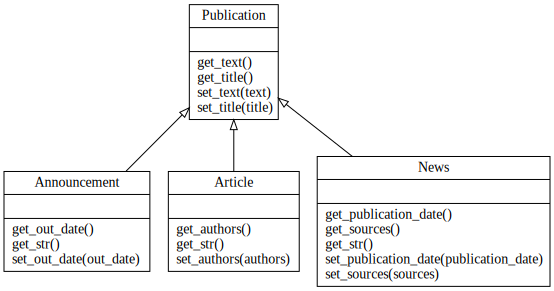

In [175]:
!pyreverse -o temp2.svg temp2.py
SVG('classes.temp2.svg')

# x. Треугольник и прямоугольник
Напишите программу, которая объявляет класс `Shape`, конструктор которого принимает ширину и высоту. После этого унаследуйте от него класс `Triangle` и `Rectangle`. Реализуйте метод `area()`, который возвращает площадь этих фигур. Продемонстрируйте работоспособность программы.

In [271]:
%%writefile task1x.py

class Shape:
    def __init__(self, base, height):
        self.base = base
        self.height = height

        
class Rectangle(Shape):
    def area(self):
        return self.base * self.height


class Triangle(Shape):
    def area(self):
        return 0.5 * self.base * self.height

Overwriting task1x.py


parsing task1x.py...


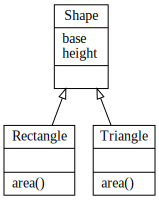

In [272]:
!pyreverse -o task1x.svg task1x.py
SVG('classes.task1x.svg')

In [289]:
import task1x
task1x = reload(task1x)

rectangle = Rectangle(4, 2)
triangle = Triangle(4, 2)
print(f"Rectangle area: {rectangle.area()}\nTriangle area: {triangle.area()}")

Rectangle area: 8
Triangle area: 4.0


# x. Дочки-матери
Напишите программу с классом `Mother` от которого наследуется класс `Daughter`. Сделайте так, чтобы результат `print(object)` был разный. Воспользуйтесь принципами полиморфизма, наследования и инкапсуляции.

In [290]:
%%writefile task2x.py

class Mother:
    __name = "unknown"

    def __init__(self, name):
        self.__name = name

    def get_name(self):
        return self.__name

    def set_name(self, name):
        self.__name = name

    def get_str(self):
        return f"Name: {self.get_name()}\n---"
    
    def __str__(self):
        return self.get_str()


class Daughter(Mother):
    __mother = "unknown"
    
    def __init__(self, name, mother):
        super().__init__(name)
        self.__mother = mother
    
    def get_mother(self):
        return self.__mother
    
    def set_mother(self, mother):
        self.__mother = mother

    def get_str(self):
        return f"Name: {self.get_name()}; Mother: {self.get_mother()}\n---"


Overwriting task2x.py


In [292]:
import task2x
task2x = reload(task2x)

m = task2x.Mother("Agatha")
d = task2x.Daughter("Elsa", "Agatha")

print(m)
print(d)

Name: Agatha
---
Name: Elsa; Mother: Agatha
---


parsing task2x.py...


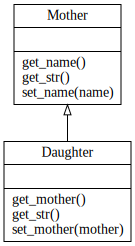

In [293]:
!pyreverse -o task2x.svg task2x.py
SVG('classes.task2x.svg')

# x. Животные
Реализйте класс `Animal`. Внутри объявите поле для имени и возраста. От класса `Animal` унаследуйте класс `Zebra` и `Dolphin`. Оба класса могут вернуть описание, содержащее имя, возраст и какую-то доп.информацию, например, что это за вид животного. Воспользуйтесь принципами полиморфизма, наследования и инкапсуляции.

# x. Игра "Арифметические драконы"
Игра "Арифметические драконы" предназначена для обучения детей арифметике. На героя нападает дракон, который задаёт вопрос на сложение (если дракон зелёный), вычитание (красный) или умножение (чёрный).

    Разбейтесь по командам по два программиста и сядьте за один компьютер.
    Скачайте архив arithmetic_dragons

    Реализуйте следующие классы:
    